In [85]:
%matplotlib inline

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
from config import plotly_api

In [87]:
plotly.tools.set_credentials_file(username='psande', api_key=plotly_api)

In [88]:
# Load the No Insurance File
no_ins_data_to_load = "Resources/no_insurance.csv"
fips_to_load = "Resources/mn_fips.csv"

# Read the MN No Insurance File
ins_df = pd.read_csv(no_ins_data_to_load)
fips_df = pd.read_csv(fips_to_load)

In [89]:
insurance_table = pd.merge(ins_df, fips_df, on="county", how="left")

In [90]:
insurance_table = insurance_table.fillna(0)
insurance_table['fips'] = insurance_table['fips'].astype(int)

In [91]:
insurance_df = insurance_table.drop(columns=['indicator', 'population', 'sex', 'povertyThreshold', 'ci'])
insurance_df.head(10)
mean_percent = round(insurance_table["percent"].mean(),2)
print(mean_percent)

6.43


In [92]:
ins_bycounty = insurance_df.groupby(['county'])
county_name = ins_bycounty["county"].unique()
fips_code = ins_bycounty["fips"].mean()
avg_count = round(ins_bycounty["count"].mean(),2)
avg_percent = round(ins_bycounty["percent"].mean(),2)

In [93]:
ins_county_df = pd.DataFrame({"County": county_name,
                 "Average Uninsured": avg_percent,
})
#ins_county_df.to_csv('uninsured_children_by_county.csv')

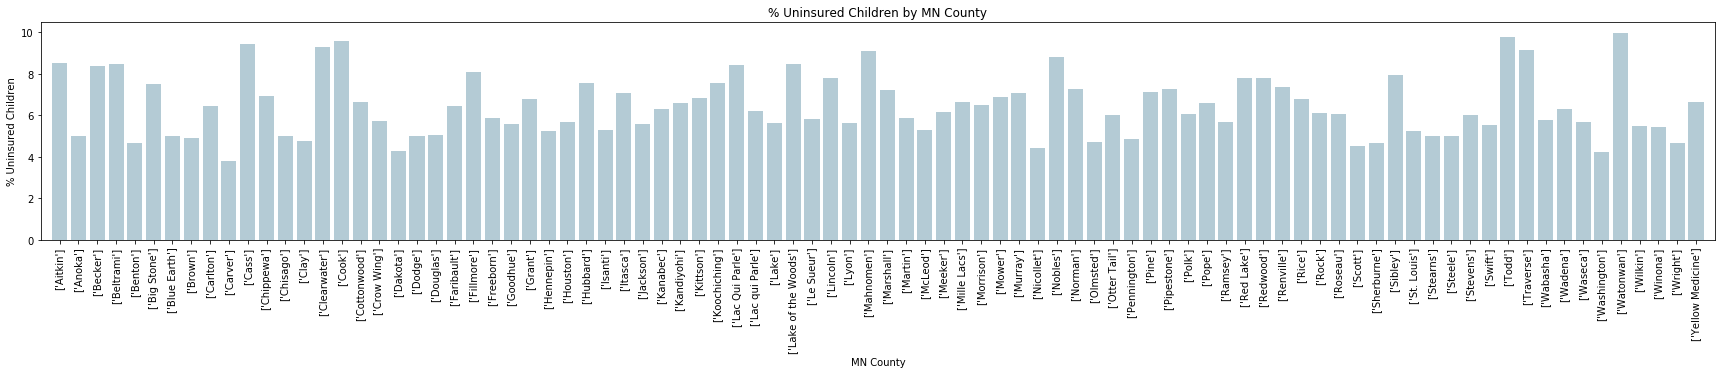

In [101]:
x_axis = np.arange(len(ins_bycounty))
tick_locations = [value+0.5 for value in x_axis]
plt.figure(figsize=(30,4))
plt.bar(x_axis, avg_percent, color="#6b99ad", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, county_name, rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.title("% Uninsured Children by MN County")
plt.xlabel("MN County")
plt.ylabel("% Uninsured Children")
plt.savefig("% Uninsured Children.png")

In [103]:
values = avg_percent
fips = fips_code

endpts = list(np.mgrid[min(values):max(values):4j])
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Minnesota'], show_state_data=True,
    binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='% Uninsured Children by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
py.iplot(fig, filename='choropleth_minnesota')

C:\Users\patri\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:6201: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False


C:\Users\patri\Anaconda3\envs\PythonData\lib\site-packages\plotly\figure_factory\_county_choropleth.py:771: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [0]



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~psande/0 or inside your plot.ly account where it is named 'choropleth_minnesota'
